In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_json('../data/raw/company_info.jsonl', lines=True)
print (dataset.head(1))

In [ ]:
# Stel de eerste rij in als kolomnamen
dataset.columns = dataset.iloc[0]

# Verwijder de eerste rij (die nu als kolomnamen is ingesteld)
dataset = dataset[1:]

# Herstel de index van de DataFrame
dataset = dataset.reset_index(drop=True)

# Bekijk de eerste paar rijen van de DataFrame na bewerking
print("DataFrame met nieuwe kolomnamen:")
print(dataset.head(5))

In [ ]:
total_size = dataset.size
amount_of_columns = dataset.shape[1]

print ("totaal aantal rijen: ", total_size)
print ("aantal kolommen: ", amount_of_columns)
print ("de verschillende kolommen: ", dataset.columns)


mediaan capital

In [54]:
median_capital = dataset['capital'].median()
avarage_capital = dataset['capital'].mean()

# Print de mediaan
print("Mediaan van de kolom 'capital':", median_capital)
print("Gemiddelde van de kolom 'capital':", avarage_capital)

Mediaan van de kolom 'capital': 18600.0
Gemiddelde van de kolom 'capital': 23904102.685151834


Aantal lege velden

In [ ]:
empyt_values = dataset.isnull().sum()
print ("Aantal lege velden", empyt_values)

Land

In [ ]:
unieke_waarden_landen = dataset['lang'].unique()
print (unieke_waarden_landen)
print ("")
# Tel het aantal voorkomens van elk land in de kolom 'lang'
aantal_voorkomens_per_land = dataset['lang'].value_counts()
print (aantal_voorkomens_per_land)

Oprichtdatum van bedrijf (start_year)

In [ ]:
start_year = dataset['start_year'].value_counts()
topfive_start_year = start_year.tail(5)
# print (start_year)
print (topfive_start_year)

bedrijf actief of niet? (status)
3197 velden zijn niet gevuld. (na), zijn dat bedrijven die failiet zijn ofzoiets dergelijks?

In [ ]:
bedrijf_actief = dataset['status'].value_counts()
print (bedrijf_actief)

Provincie waarin het bedrijf gevestigd is

In [ ]:
provincies = dataset['addr_province'].value_counts()
print (provincies)

In [ ]:
company_type = dataset['company_type'].value_counts()
print (company_type.head(20))

In [51]:
# Indexen die je wilt filteren
selected_indices = [3397, 8873, 9470, 21877, 24169, 30834, 38473, 53294, 66386]
selected_indices = [85032, 88419, 113209, 178008, 182375, 199487, 214069, 217598]

# Filter de DataFrame op basis van de geselecteerde indexen
filtered_data = dataset.loc[selected_indices]

# Print de gefilterde DataFrame
print(filtered_data['capital'])

85032      18600
88419     285077
113209     18600
178008        -1
182375     37200
199487    300000
214069    110000
217598     18600
Name: capital, dtype: object


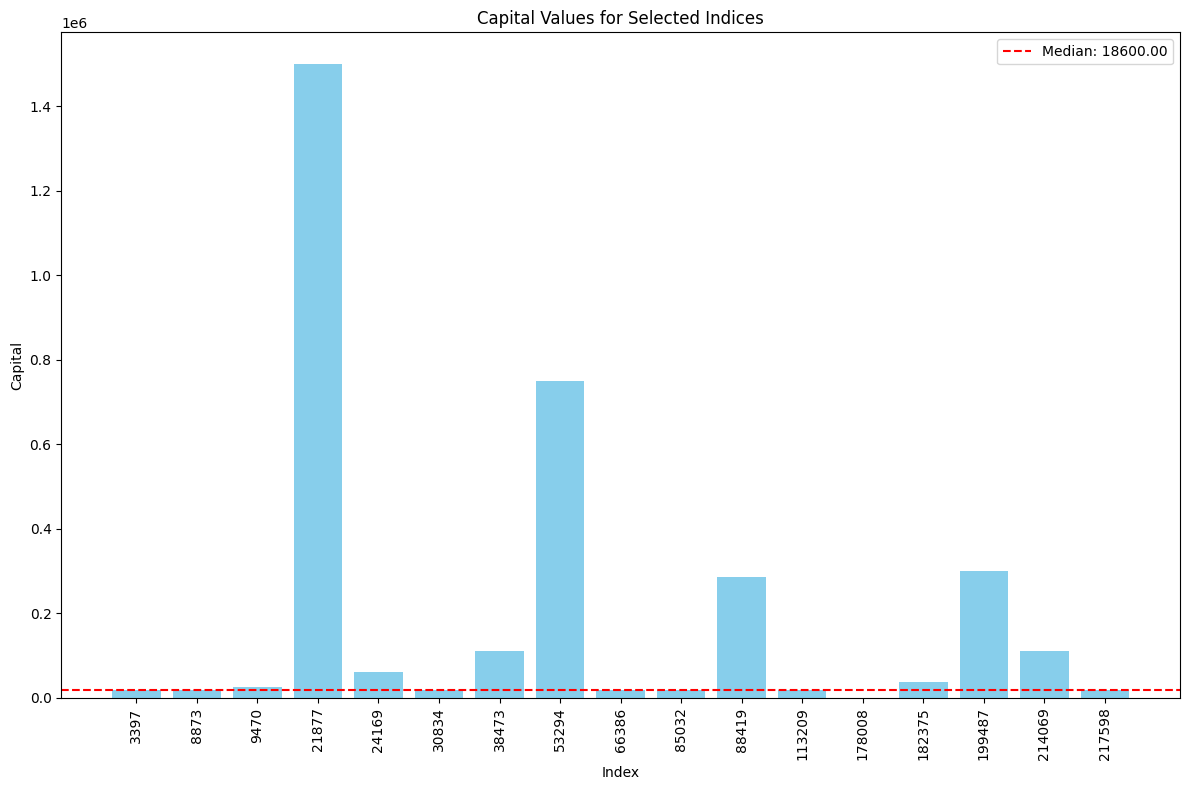

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Bereken de mediaan van de 'capital' kolom
median_capital = dataset['capital'].median()

# Indexen die je wilt filteren
selected_indices = [3397, 8873, 9470, 21877, 24169, 30834, 38473, 53294, 66386, 
                    85032, 88419, 113209, 178008, 182375, 199487, 214069, 217598]

# Filter de DataFrame op basis van de geselecteerde indexen
filtered_data = dataset.loc[selected_indices]

# Visualiseer de 'capital' kolom
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data.index.astype(str), filtered_data['capital'], color='skyblue')

# Voeg een lijn voor de mediaan toe
plt.axhline(y=median_capital, color='r', linestyle='--', label=f'Median: {median_capital:.2f}')

# Labels en titel
plt.xlabel('Index')
plt.ylabel('Capital')
plt.title('Capital Values for Selected Indices')
plt.xticks(rotation=90)  # Draai de x-labels voor betere leesbaarheid
plt.legend()  # Voeg een legenda toe
plt.tight_layout()  # Zorg ervoor dat alles netjes in de figuur past

# Toon de plot
plt.show()